###  Benford's Law

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=2.29658e-92, Tstat=450.965


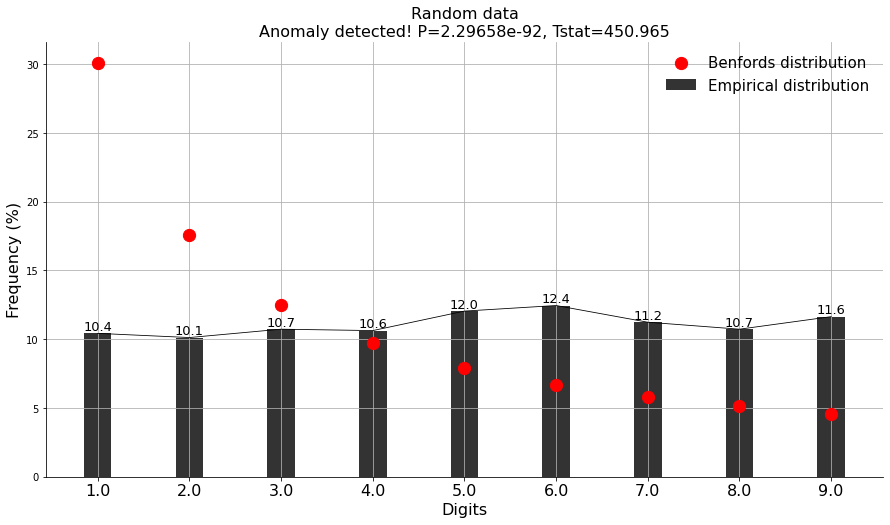

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Random data\nAnomaly detected! P=2.29658e-92, Tstat=450.965'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [1]:
# Import library
import numpy as np
from benfordslaw import benfordslaw

# Create uniform random data which does definitely not follow Benfords distribution.
X = np.random.randint(0, high=100, size=1000)

# Initialize with alpha and method.
bl = benfordslaw(alpha=0.05, method='chi2')

#print(X)
# array([13, 12,  2,  4, 99, 33, 71, 69, 65, 55,  6, 30, 30, 99, 43, 36, 12,....]

# Fit
results = bl.fit(X)

# As expected, a significant P-value is detected for the inupt data X
# [benfordslaw] >Analyzing digit position: [1]
# [benfordslaw] >[chi2] Anomaly detected! P=3.46161e-73, Tstat=361.323

# Plot
bl.plot(title='Random data')

####  Trump's election

[benfordslaw] >Import dataset [USA]
[ 5387 23618  1710 ...    16    21     0]
[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] No anomaly detected. P=0.415072, Tstat=8.19065


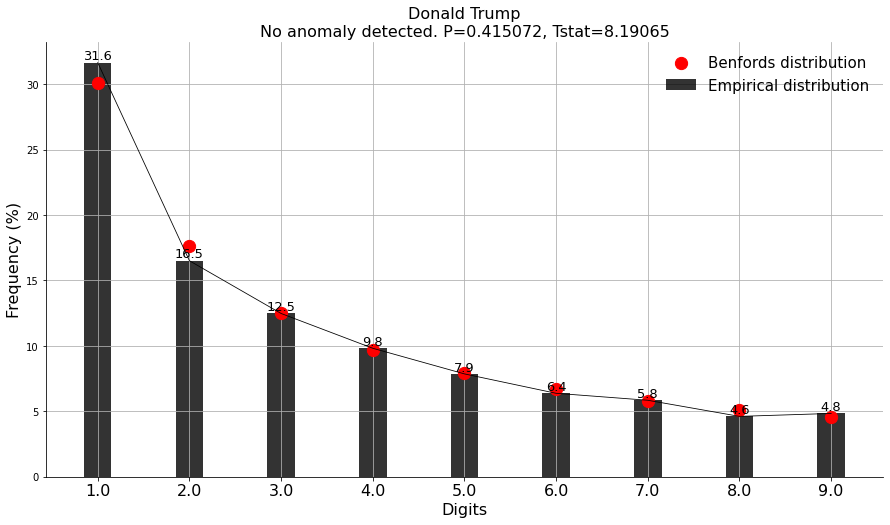

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Donald Trump\nNo anomaly detected. P=0.415072, Tstat=8.19065'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [2]:
from benfordslaw import benfordslaw

# Initialize
bl = benfordslaw(alpha=0.05)

# Load elections example
df = bl.import_example(data='USA')

# Extract election information.
X = df['votes'].loc[df['candidate']=='Donald Trump'].values

# Print
print(X)
# array([ 5387, 23618,  1710, ...,    16,    21,     0], dtype=int64)

# Make fit
results = bl.fit(X)

# Plot
bl.plot(title='Donald Trump')

[benfordslaw] >Import dataset [USA]
[benfordslaw] >Analyzing digit position: [2]
[benfordslaw] >[chi2] No anomaly detected. P=0.840571, Tstat=4.92762


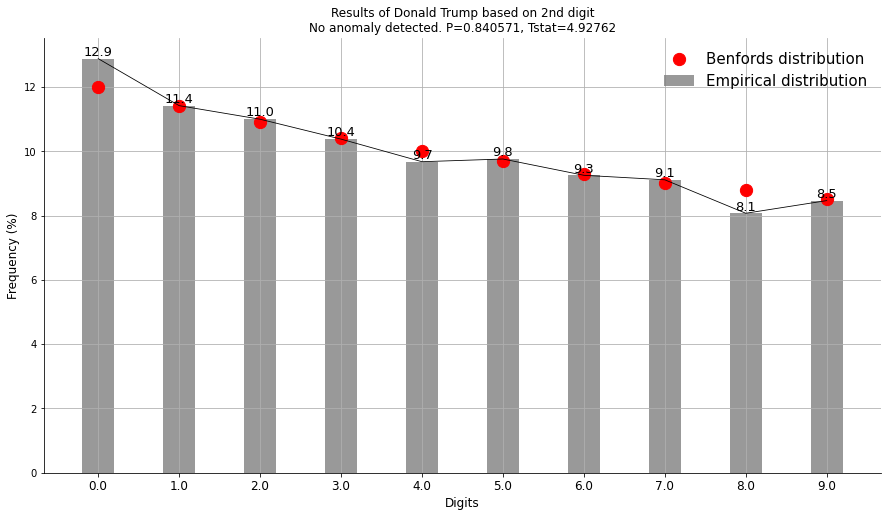

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Results of Donald Trump based on 2nd digit\nNo anomaly detected. P=0.840571, Tstat=4.92762'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [3]:
from benfordslaw import benfordslaw

# Initialize
bl = benfordslaw(pos=2)

# Load elections example
df = bl.import_example(data='USA')

# Extract election information.
X = df['votes'].loc[df['candidate']=='Donald Trump'].values

# Make fit
results = bl.fit(X)

# Plot
bl.plot(title='Results of Donald Trump based on 2nd digit', barcolor=[0.5, 0.5, 0.5], fontsize=12, barwidth=0.4)


[benfordslaw] >Import dataset [USA]
[benfordslaw] >Analyzing digit position: [-1]
[benfordslaw] >[chi2] Anomaly detected! P=4.79488e-306, Tstat=1441.96


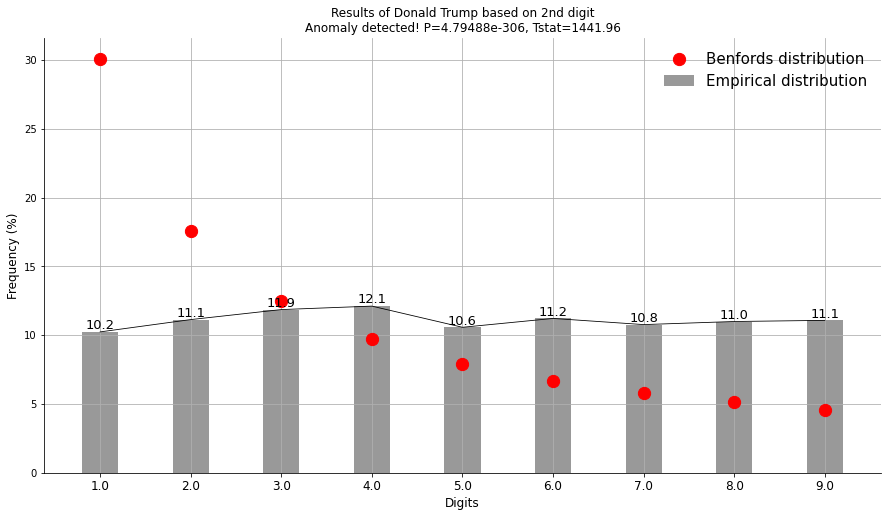

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Results of Donald Trump based on 2nd digit\nAnomaly detected! P=4.79488e-306, Tstat=1441.96'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [4]:
from benfordslaw import benfordslaw

# Initialize
bl = benfordslaw(pos=-1)

# Load elections example
df = bl.import_example(data='USA')

# Extract election information.
X = df['votes'].loc[df['candidate']=='Donald Trump'].values

# Make fit
results = bl.fit(X)

# Plot
bl.plot(title='Results of Donald Trump based on 2nd digit', barcolor=[0.5, 0.5, 0.5], fontsize=12, barwidth=0.4)


[benfordslaw] >Import dataset [USA]
[benfordslaw] >Analyzing digit position: [-2]
[benfordslaw] >[chi2] Anomaly detected! P=0.000396883, Tstat=30.2555


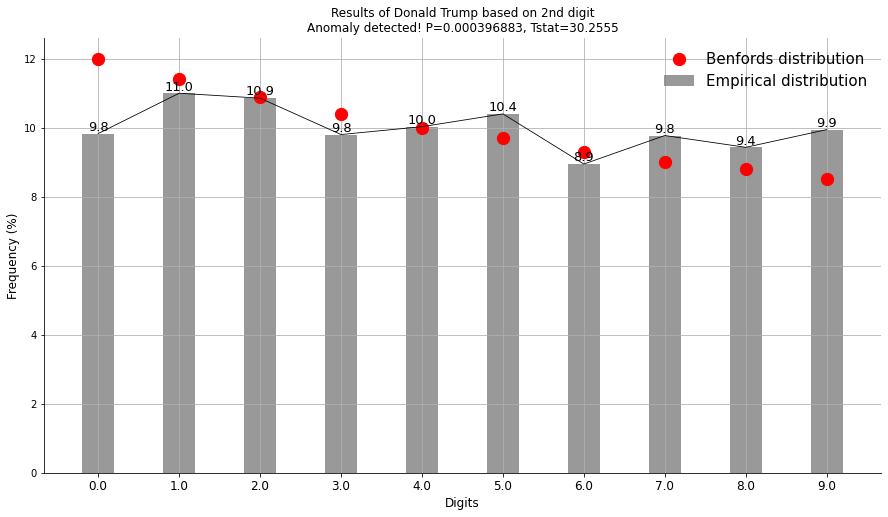

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Results of Donald Trump based on 2nd digit\nAnomaly detected! P=0.000396883, Tstat=30.2555'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [5]:
from benfordslaw import benfordslaw

# Initialize
bl = benfordslaw(pos=-2)

# Load elections example
df = bl.import_example(data='USA')

# Extract election information.
X = df['votes'].loc[df['candidate']=='Donald Trump'].values

# Make fit
results = bl.fit(X)

# Plot
bl.plot(title='Results of Donald Trump based on 2nd digit', barcolor=[0.5, 0.5, 0.5], fontsize=12, barwidth=0.4)

###  Checking 3G & LTE Network data using Benford's Law

In [6]:
import pandas as pd

In [7]:
KPI_df = pd.read_csv("Sector Level Hourly_2023-04-16.csv")

In [8]:
city_df = pd.read_excel("Sector_City.xlsx")

In [9]:
data_df = pd.merge(KPI_df, city_df, how='left', left_on=['Sector'], right_on=['Sector'])

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Sector                     1048575 non-null  object 
 1   Date                       1048575 non-null  object 
 2   TotalPayload               1048568 non-null  float64
 3   ConnectedUser              1048575 non-null  float64
 4   PPU                        1048568 non-null  float64
 5   UserThroughput             1045870 non-null  float64
 6   UPM                        1048575 non-null  float64
 7   Expected_Payload           1048575 non-null  float64
 8   Loss_Payload               1048568 non-null  float64
 9   CITY ON COUNTRY DIVISIONS  1032965 non-null  object 
dtypes: float64(7), object(3)
memory usage: 88.0+ MB


In [11]:
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df['Hour'] = data_df['Date'].dt.hour

In [12]:
data_df.dropna(inplace=True)
data_df.reset_index(inplace=True, drop=True)

In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030457 entries, 0 to 1030456
Data columns (total 11 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Sector                     1030457 non-null  object        
 1   Date                       1030457 non-null  datetime64[ns]
 2   TotalPayload               1030457 non-null  float64       
 3   ConnectedUser              1030457 non-null  float64       
 4   PPU                        1030457 non-null  float64       
 5   UserThroughput             1030457 non-null  float64       
 6   UPM                        1030457 non-null  float64       
 7   Expected_Payload           1030457 non-null  float64       
 8   Loss_Payload               1030457 non-null  float64       
 9   CITY ON COUNTRY DIVISIONS  1030457 non-null  object        
 10  Hour                       1030457 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int

[ 2193.    48.  7498. ... 23470.  8463. 13416.]
[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=22026.4


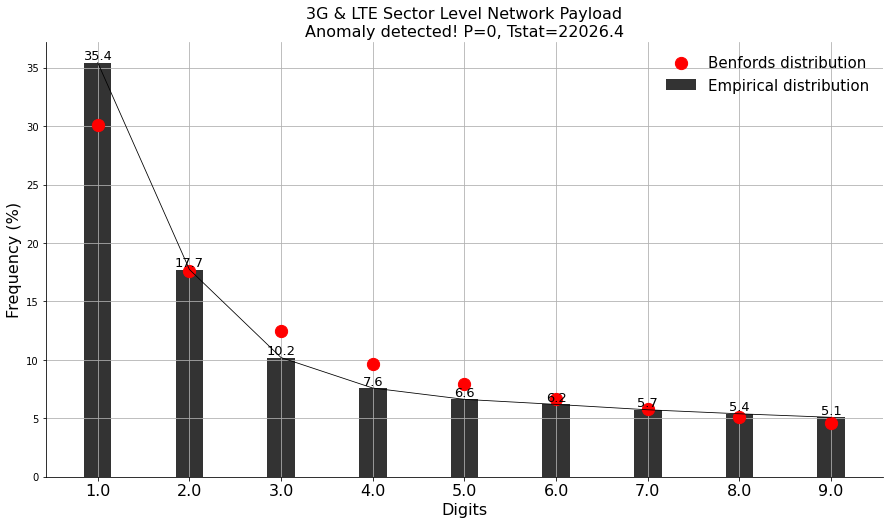

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'3G & LTE Sector Level Network Payload\nAnomaly detected! P=0, Tstat=22026.4'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [14]:
from benfordslaw import benfordslaw

# Initialize
bl = benfordslaw(alpha=0.05, pos=1)

# Extract the information.
X = data_df.TotalPayload.values * 1000

# Print
print(X)

# Make fit
results = bl.fit(X)

# Plot
bl.plot(title='3G & LTE Sector Level Network Payload')

In [15]:
data_df['CITY ON COUNTRY DIVISIONS'].unique()

array(['بیرون از شهر کرمانشاه', 'مهاباد', 'کتالم وسادات شهر', ...,
       'آلاشت', 'بابامنیر', 'چاه ورز'], dtype=object)

[17957.  6314. 12524. ... 25608.  3495.  8197.]
[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=12335.3


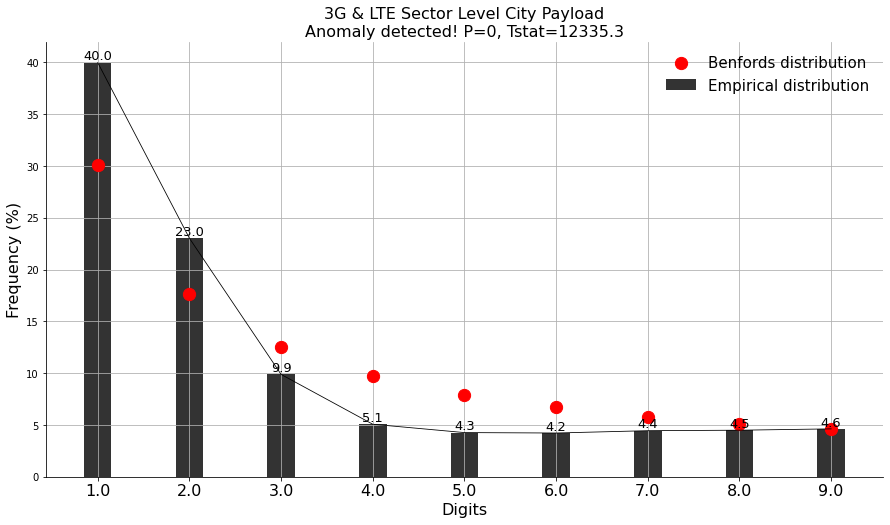

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'3G & LTE Sector Level City Payload\nAnomaly detected! P=0, Tstat=12335.3'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [16]:
from benfordslaw import benfordslaw

# Initialize
bl = benfordslaw(alpha=0.05)

# Extract the information.
X = data_df.TotalPayload.loc[data_df['CITY ON COUNTRY DIVISIONS']=='تهران'].values * 1000
#X = data_df.TotalPayload.values * 1000

# Print
print(X)

# Make fit
results = bl.fit(X)

# Plot
bl.plot(title='3G & LTE Sector Level City Payload')

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] No anomaly detected. P=0.252044, Tstat=10.1885


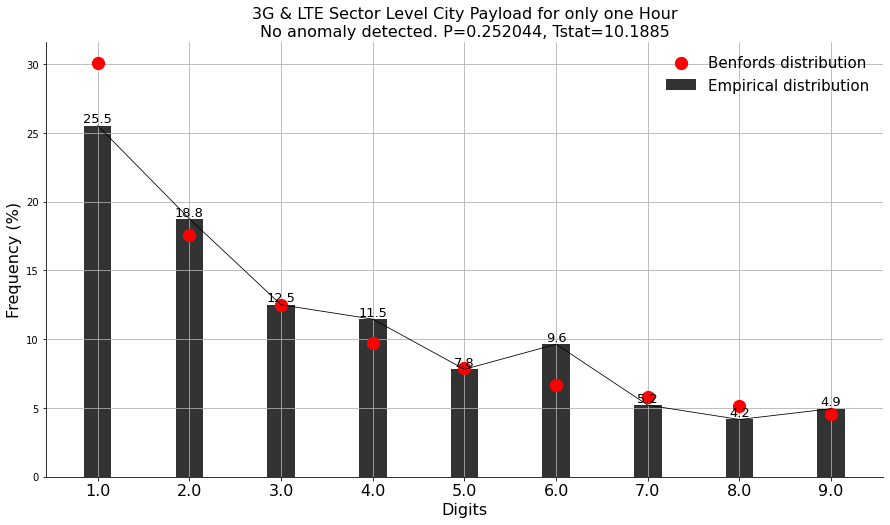

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'3G & LTE Sector Level City Payload for only one Hour\nNo anomaly detected. P=0.252044, Tstat=10.1885'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [18]:
from benfordslaw import benfordslaw

# Initialize
bl = benfordslaw(alpha=0.05)

# Extract the information.
X = data_df.TotalPayload.loc[(data_df['CITY ON COUNTRY DIVISIONS'] =='یزد') & (data_df['Hour']== 5)].values * 1000

# Print
#print(X)

# Make fit
results = bl.fit(X)

# Plot
bl.plot(title='3G & LTE Sector Level City Payload for only one Hour')